In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random

In [5]:
def convert_from_yolo_to_cv2(input_txt):
    
    updated=[]
    annotations = input_txt.split('\n')[:-1]
    num_digits = len(annotations)
    
    for i in annotations:
        temp = i.split(' ')
        temp[1] = round(float(temp[1])*(28*num_digits))
        temp[2] = round(float(temp[2])*(28))
        temp[3] = round(float(temp[3])*(28*num_digits))
        temp[4] = round(float(temp[4])*(28))

        # x min
        x_min = int(temp[1]-temp[3]/2)
        x_max = int(temp[1]+temp[3]/2)
        y_min = int(temp[2]-temp[4]/2)
        y_max = int(temp[2]+temp[4]/2)

        updated.append([temp[0], x_min,x_max,y_min,y_max])
    
    return updated

In [48]:
def get_img_with_boxes(img_sample, ann_sample):
    img_sample = np.array(img_sample)
    
    for i in ann_sample:
        img_sample = cv2.rectangle(np.array(img_sample), pt1=(i[1],i[4]), pt2=(i[2],i[3]), color=(255,255,255), thickness=1)
        img_sample = cv2.putText(img_sample, i[0], (i[1], i[4]- 3),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,10,255), 1)
                
    return img_sample

In [15]:
img_list = []
for img in ['999.png','1.png','180.png']:
    img_list.append(Image.open(f'./data/YOLO_data_je/images/{img}'))

ann_list = []
for file in ['999.txt','1.txt','180.txt']:
    with open(f'./data/predict/labels/{file}', "r") as f:
        sample_annotation = f.read()
        ann_list.append(convert_from_yolo_to_cv2(sample_annotation))
        f.close()

In [8]:
img_list

[<PIL.PngImagePlugin.PngImageFile image mode=L size=112x28>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=112x28>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=112x28>]

In [35]:
ann_list

[[['2', 57, 82, 1, 26],
  ['1', 85, 110, 1, 26],
  ['7', 1, 26, 1, 26],
  ['8', 29, 54, 1, 26]],
 [['1', 85, 110, 1, 26],
  ['4', 29, 54, 1, 26],
  ['5', 1, 26, 1, 26],
  ['5', 57, 82, 1, 26]],
 [['6', 57, 82, 1, 26],
  ['6', 85, 110, 1, 26],
  ['3', 29, 54, 1, 26],
  ['3', 1, 26, 1, 26]]]

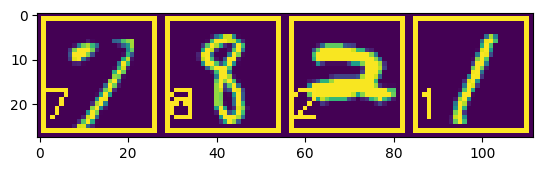

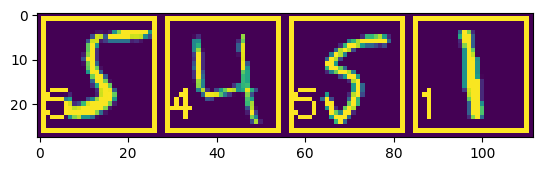

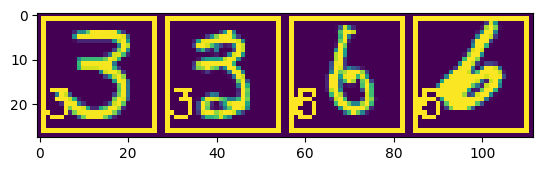

In [49]:
for i in range(len(img_list)):
    img_temp = get_img_with_boxes(img_list[i], ann_list[i])
    
    plt.imshow(img_temp)
    plt.show()
